<h1 align="center">
  <span style="font-family:Papyrus; color:#27ae60; background-color:#f39c12; padding:10px;">
    💰 Loan Application Prediction Project 💎
  </span>
</h1>

## Project Description
This dataset encompasses details of applicants seeking loans. It provides information such as credit history, loan amount, income, dependents, etc.

### Independent Variables:
1. **Loan_ID:** Unique identifier for the applicant's affirmed purchases.
2. **Gender:** Categorization of applicants based on reproductive functions (male/female).
3. **Married:** Applicant's marital status.
4. **Dependents:** Individuals relying on the applicant for survival.
5. **Education:** Number of years of systematic instruction received by the applicant.
6. **Self_Employed:** Employment status indicating self-employment or working for an employer.
7. **Applicant Income:** Disposable income available for the applicant's use under State law.
8. **CoapplicantIncome:** Disposable income available for individuals participating in the loan application process.
9. **Loan_Amount:** Amount of money the applicant owes at any given time.
10. **Loan_Amount_Term:** Duration for which the loan is availed to the applicant.
11. **Credit History:** Record of the applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. **Property_Area:** Total area within the boundaries of the property.
13. **Loan_Status:** Eligibility status for the requested loan.

## Dataset Description
The task is to build a predictive model determining whether the applicant's loan will be approved (Loan_Status) based on the provided dataset.

[Dataset Link](https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv)


In [2]:
# Import Neccessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# read the data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape    

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Preprocessing for Machine Learning

### Input Variables Overview

The dataset contains a mixture of numerical and categorical/ordinal data types. There are 8 columns that are categorical and 5 numerical. The target variable is `Loan Status`. The non-numerical columns are represented using strings.

### Categorical Variable Encoding

To prepare the data for machine learning, we need to encode the categorical variables. Two common methods are ordinal encoding and one-hot encoding.

#### Ordinal Encoding

Ordinal encoding is suitable for categorical variables with a clear order or hierarchy.

## - Exploratory Data Analysis

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## The following columns in the dataset have missing values:

- **Gender**
- **Married**
- **Dependents**
- **Self_Employed**
- **LoanAmount**
- **Loan_Amount_Term**
- **Credit_History**

In [7]:
# Imputing missing values

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we don't have any null values in our dataset

In [9]:
# count of unique values in dataset
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
# DType converston from float to int :

df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
df['Credit_History']=df['Credit_History'].astype('int')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int')

In [11]:
# let's see loan status as per Credit History
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,95,44,139
1,97,378,475
All,192,422,614


Applicants with credit history of 1 are more likely to be eligible for loan.

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

class is imbalanced. We will scale it in later part.

In [13]:
# let's check duplicate values
df.duplicated().sum()

0

In [14]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
# Replacing 3+ with 4 
df=df.replace(to_replace='3+', value=4)

In [16]:
# Drop ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.412162,342.000000,0.773616
std,6109.041673,2926.24876,84.037468,64.372489,0.418832
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


## EDA Concluding Remarks

- Target Variable: Imbalanced with 422 'Yes' and 192 'No' values.
- Applicant Income: Ranges between 150 and 81,000.
- Loan Amount: Ranges between 9 and 700.
- Missing Values: Columns - Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History had missing values. Imputed using respective mode and mean.
- Credit History: Applicants with a credit history of 1 are more likely to be eligible for a loan.
- Categorical Variables: Need to be ordinal or one-hot encoded.


## -  Data Visualization

In [18]:
# grouping categorical columns
cat_cols = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num_cols = [y for y in df.columns if df[y].dtypes!='O']

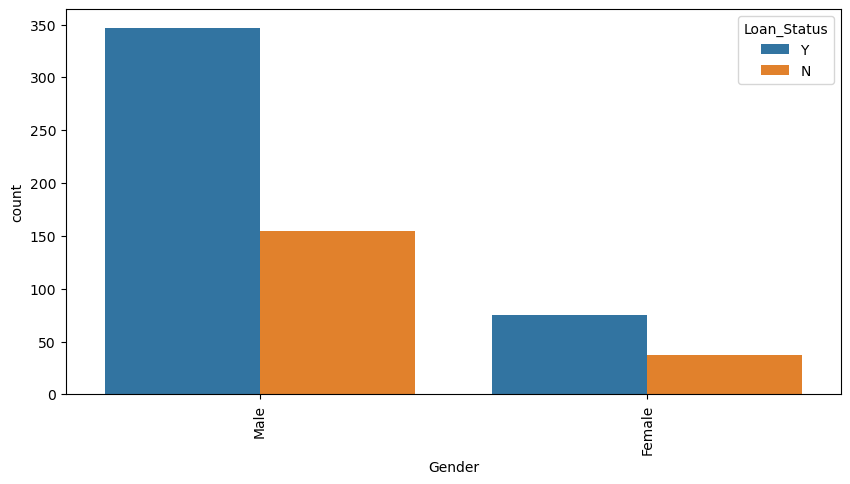

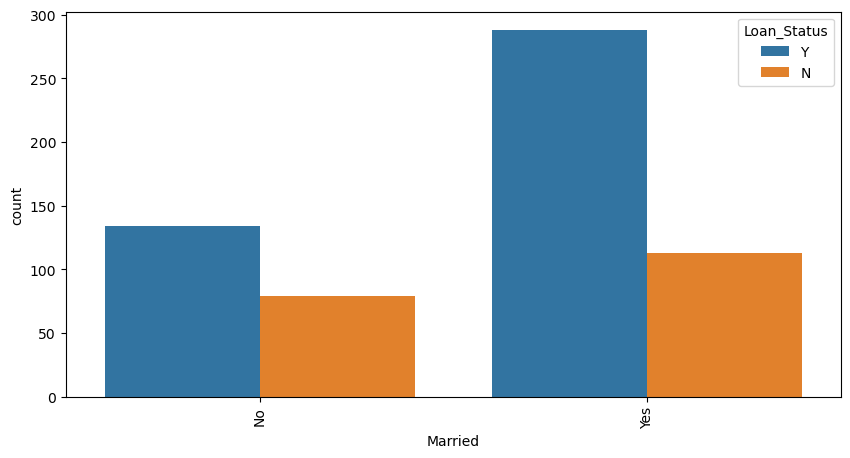

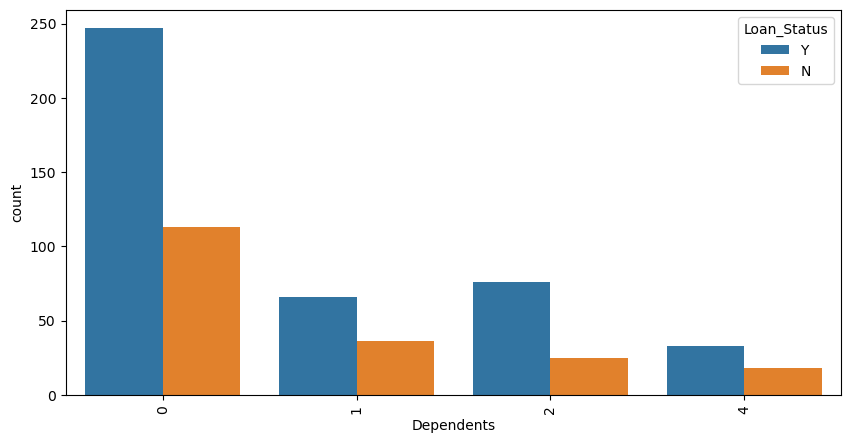

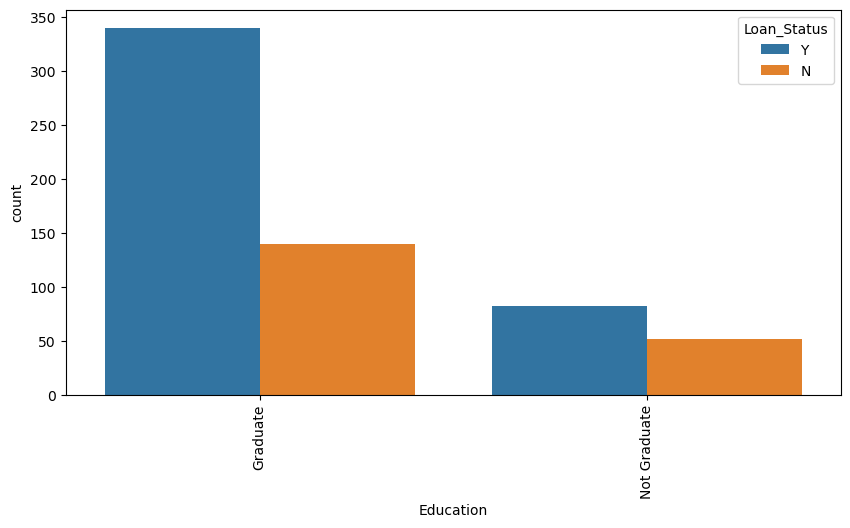

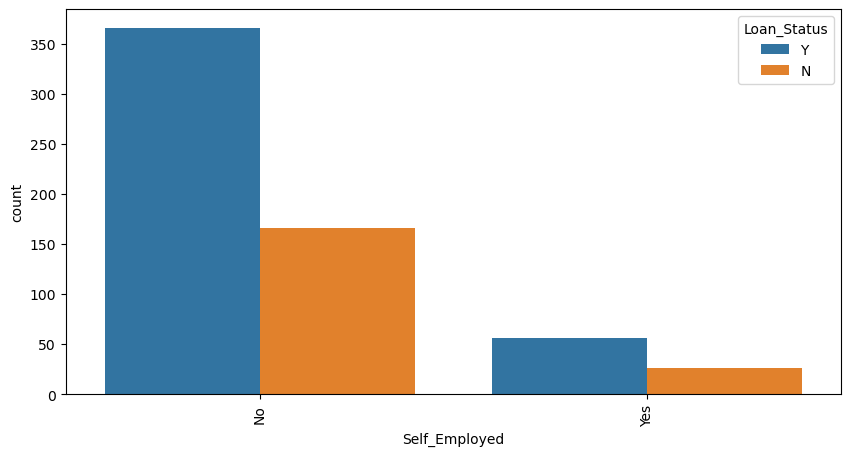

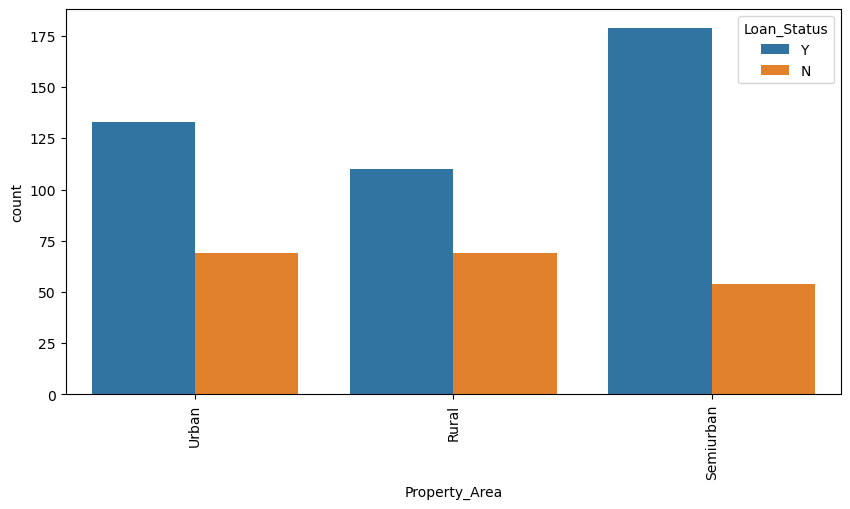

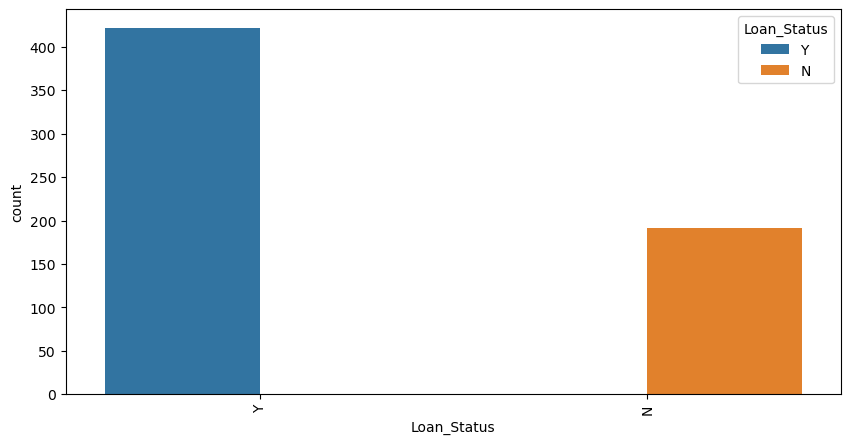

In [19]:
for i in df[cat_cols]:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=df,hue='Loan_Status')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Observations:

- **Gender:**
  - More loan applications are from males than females.

- **Marital Status:**
  - More loan applications are from married individuals.

- **Education:**
  - A higher number of loan applicants are graduates.

- **Location:**
  - More loan applications are from individuals in "Semiurban" and "Urban" areas.

- **Employment Status:**
  - Maximum loan applications are from individuals who are not self-employed.
  - For those not self-employed, loan approval rates are similar.

- **Education Impact:**
  - Loan approval is more likely for educated individuals.


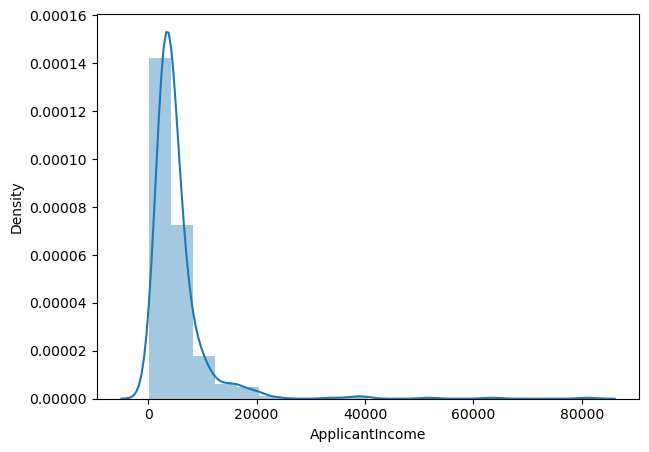

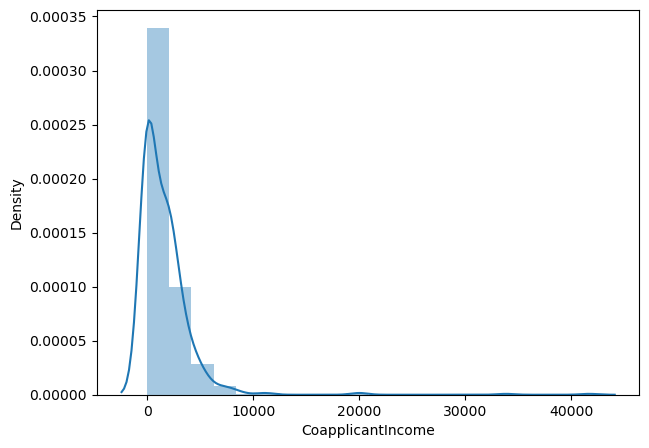

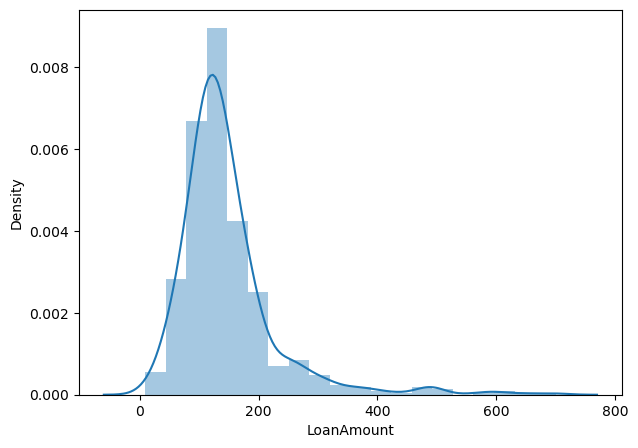

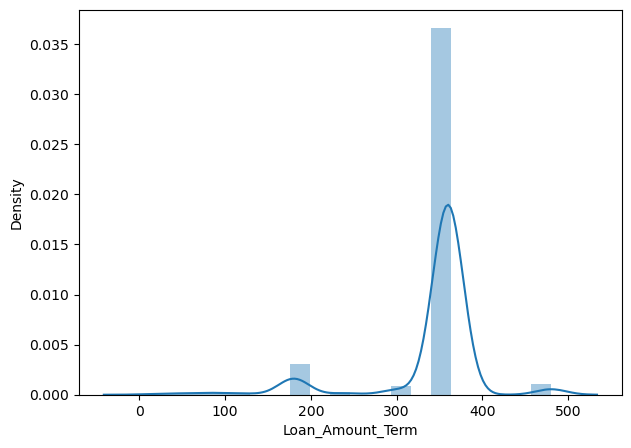

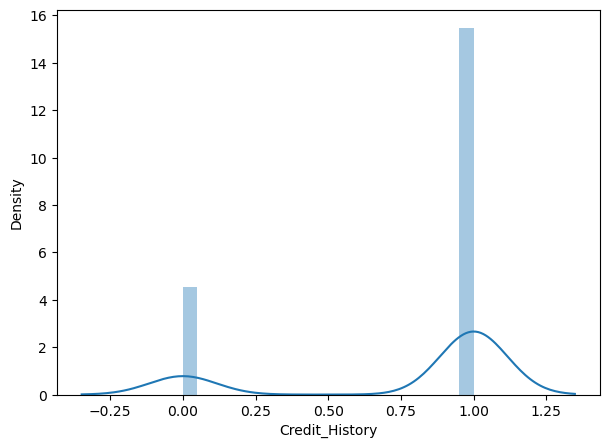

In [20]:
for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,bins = 20,kde=True)
    plt.show()

## Observations:

- **Loan Term:**
  - Most applicants prefer a 360-term plan for a loan.

- **Marital Status and Gender:**
  - Married females have a higher chance of loan approval.

- **Data Distribution:**
  - The data is not normally distributed; it is skewed.

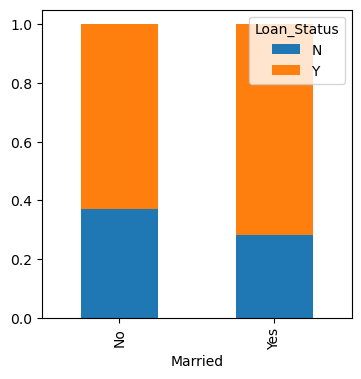

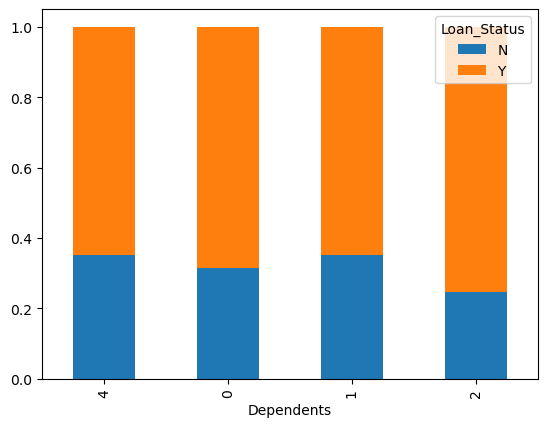

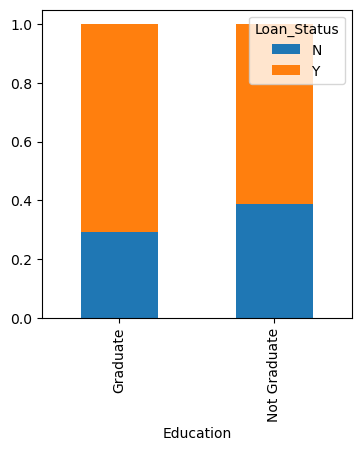

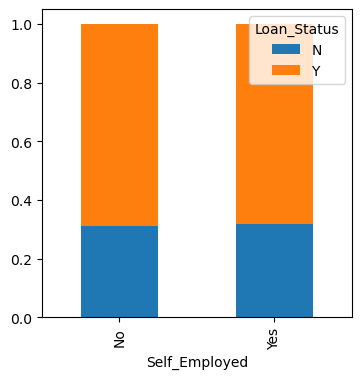

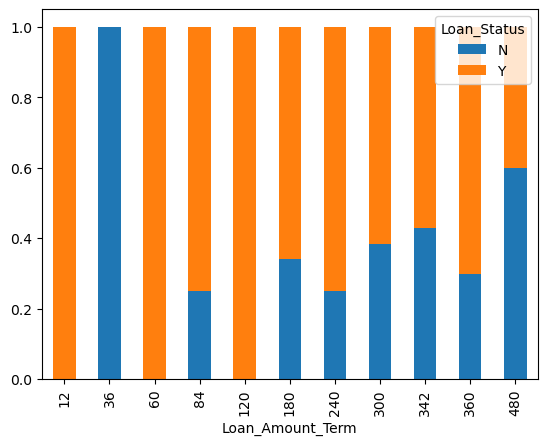

In [21]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
ct = pd.crosstab(df.Loan_Amount_Term,df.Loan_Status,normalize='index')

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

ct.plot.bar(stacked=True)
plt.show()

## Observations:

- **Marital Status and Gender:**
  - Married females have a higher chance of loan approval.

- **Dependents and Self Employed:**
  - The number of dependents and self-employed status doesn't significantly affect Loan Status.

- **Education Impact:**
  - Graduates have slightly higher chances for loan approval.

- **Loan Term:**
  - Loan term of 36 months is associated with mostly rejections.
  - Loan terms of 12 and 120 months have a higher chance of loan approval.


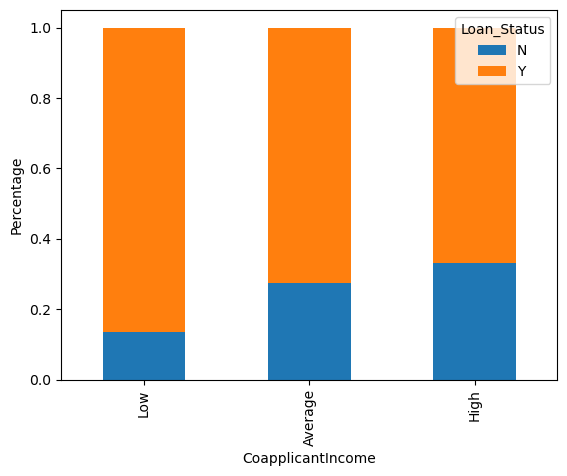

In [22]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

## Observation:

- **Coapplicant Income:**
  - Applicants with a high coapplicant income have higher chances of loan approval.

## - Outlier Removal

In [24]:
from scipy.stats import zscore
z_score = zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis =1)
new_df = df[filtering_entry]

In [25]:
# Loss of data
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0]*100)

shape before         : (614, 13)
shape after          : (577, 13)
Percentage Loss      : 6.026058631921824


In [26]:
df = new_df

In [27]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)

df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_Income_bin
0,1,0,0,0,0,5849,0,146.412162,360,1,2,1,NaN
1,1,1,1,0,0,4583,1508,128.000000,360,1,0,0,Average
2,1,1,0,0,1,3000,0,66.000000,360,1,2,1,NaN
3,1,1,0,1,0,2583,2358,120.000000,360,1,2,1,Average
4,1,0,0,0,0,6000,0,141.000000,360,1,2,1,NaN


In [29]:
#drop Coapplicant Income Bin column
df.drop(["Coapplicant_Income_bin"],axis=1,inplace= True)

In [30]:
#Skewness
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## Feature Types:

- **Non-Categorical Features:**
  - ApplicantIncome
  - CoapplicantIncome
  - Loan_Amount_Term
  - Credit_History

- **Categorical Features:**
  - Rest of the features are continuous.
  - Skewness will not be treated for continuous features.
  
- **Target Column:**
  - Loan_Status (Target column)


In [31]:
#Removing skewness
#Apply yeo-johnson Power transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df['ApplicantIncome'] = scaler.fit_transform(df['ApplicantIncome'].values.reshape(-1,1))
df['CoapplicantIncome'] = scaler.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1))
df['LoanAmount'] = scaler.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = scaler.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = scaler.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [32]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191870
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

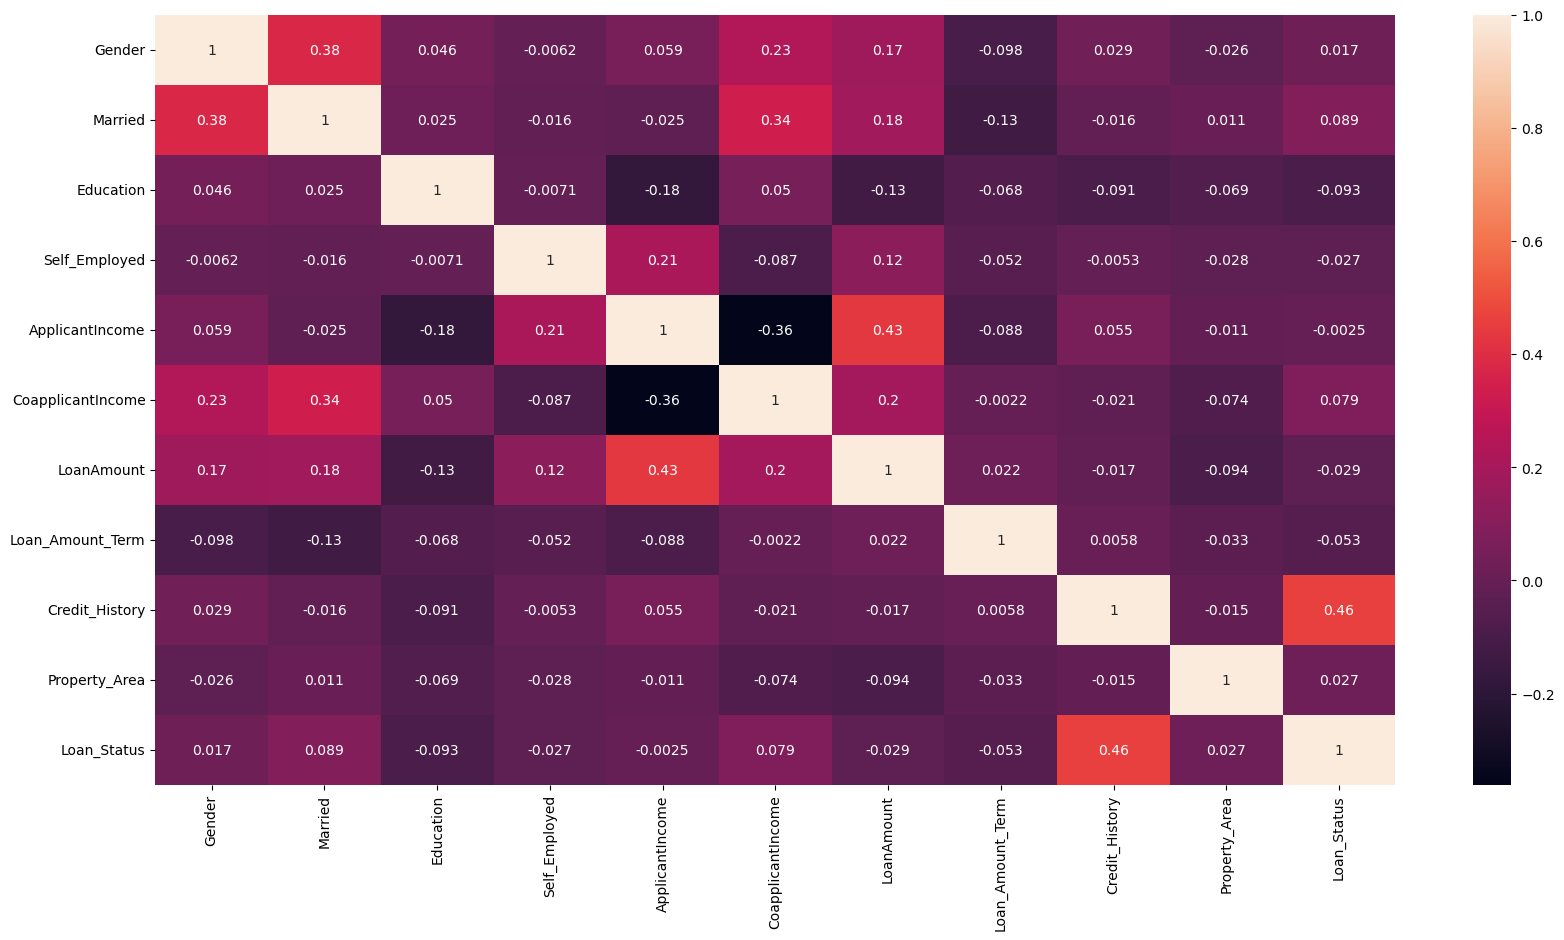

In [33]:
# let's check corelation in heat map
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

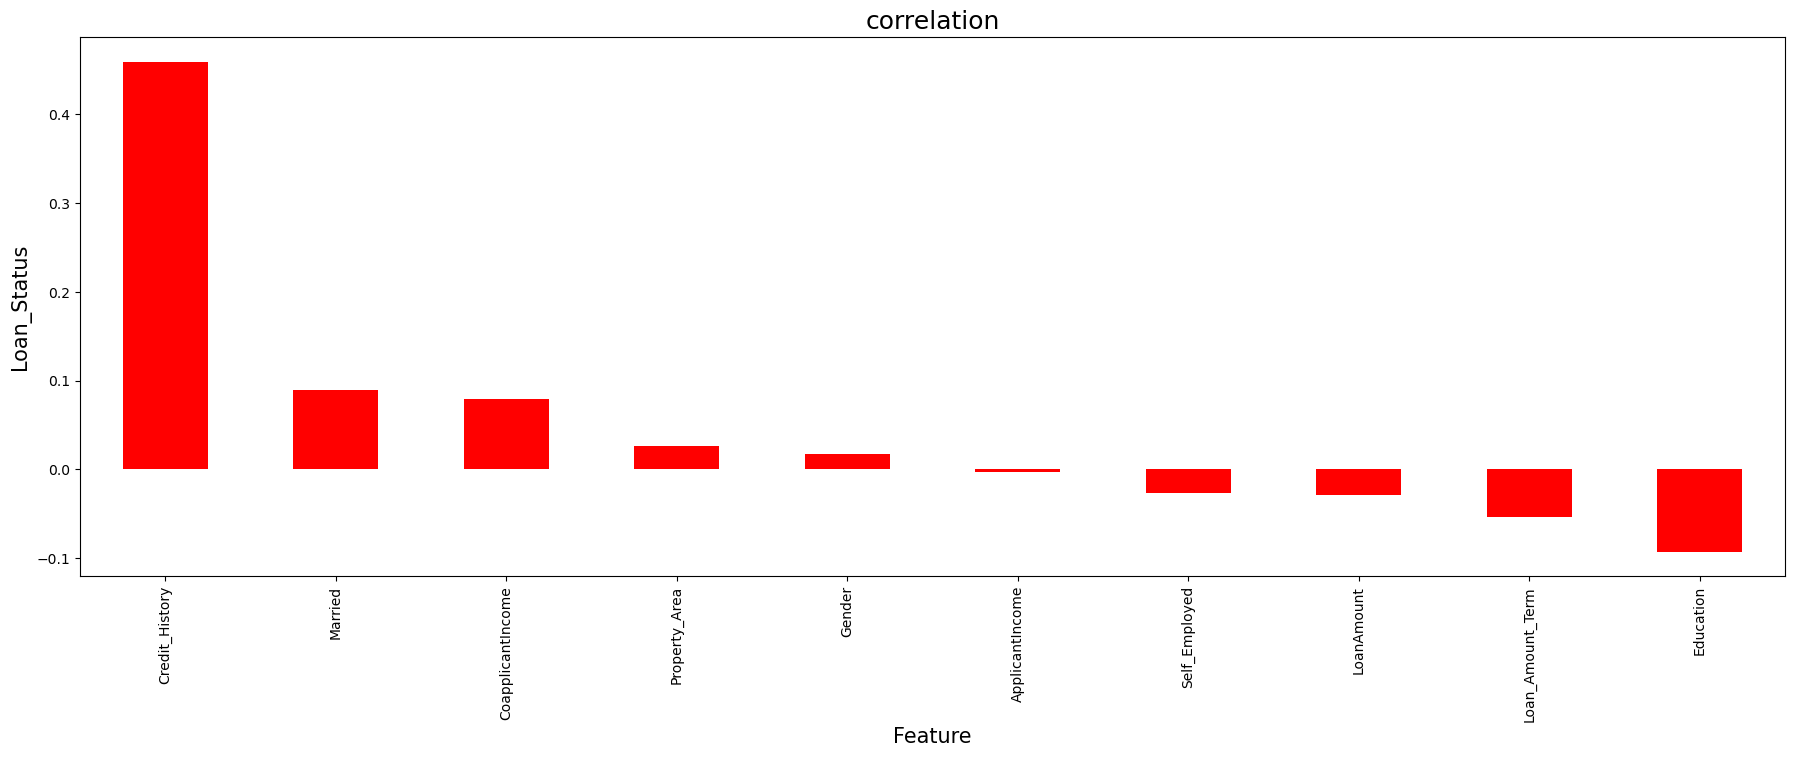

In [35]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'r')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

## Correlation with Target Column:

- **Observation:**
  - None of the columns show a strong correlation with the target column, except for `Credit_History`.


In [36]:
#we will use SMOTE to overcome imbalance
y = df['Loan_Status']
X = df.drop(columns = ['Loan_Status'])

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [39]:
#Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## - Building Machine Learning Model

In [40]:
# find the best random state
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.7939698492462312 on Random_state 189


In [41]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred_lr = LR.predict(x_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))
print("Classification Report:\n", classification_report(y_test, pred_lr))

# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred_dt = DT.predict(x_test)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))
print("Classification Report:\n", classification_report(y_test, pred_dt))

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rf))
print("Classification Report:\n", classification_report(y_test, pred_rf))

# Support Vector Machine
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svc))
print("Classification Report:\n", classification_report(y_test, pred_svc))


Logistic Regression:
Accuracy: 0.7939698492462312
Confusion Matrix:
 [[74 28]
 [13 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.75      0.87      0.80        97

    accuracy                           0.79       199
   macro avg       0.80      0.80      0.79       199
weighted avg       0.80      0.79      0.79       199


Decision Tree:
Accuracy: 0.7386934673366834
Confusion Matrix:
 [[75 27]
 [25 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       102
           1       0.73      0.74      0.73        97

    accuracy                           0.74       199
   macro avg       0.74      0.74      0.74       199
weighted avg       0.74      0.74      0.74       199


Random Forest:
Accuracy: 0.8391959798994975
Confusion Matrix:
 [[86 16]
 [16 81]]
Classification Report:
               precis

In [43]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

rwr=cross_val_score(DT, X, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

rwr=cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.7248899371069182
Cross validation score of DecisionTree model : 0.7424764150943396
Cross validation score of RandomForest model : 0.8002830188679246
Cross validation score of SVC model : 0.7248899371069182


**Random Forest** has highest Accuracy and CV score ;making it the best model.

In [45]:
#AUC and ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All models are trained")

All models are trained


Accuracy of Logistic Regression model: 0.7939698492462312
Accuracy of Decision Tree model: 0.7386934673366834
Accuracy of Random Forest model: 0.8190954773869347
Accuracy of Support Vector Machine model: 0.7437185929648241
ROC AUC Score of Logistic Regression model: 0.7957347887608652
ROC AUC Score of Decision Tree model: 0.73903375783303
ROC AUC Score of Random Forest model: 0.8192338791186577
ROC AUC Score of Support Vector Machine model: 0.7457044673539519


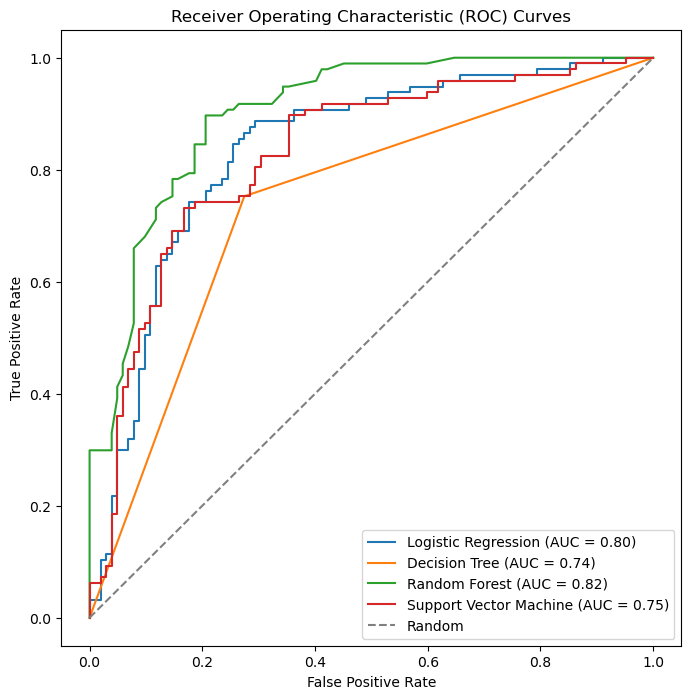

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

acc_lr = LR.score(x_test, y_test)
acc_dt = DT.score(x_test, y_test)
acc_rf = rf.score(x_test, y_test)
acc_svc = svc.score(x_test, y_test)

print("Accuracy of Logistic Regression model:", acc_lr)
print("Accuracy of Decision Tree model:", acc_dt)
print("Accuracy of Random Forest model:", acc_rf)
print("Accuracy of Support Vector Machine model:", acc_svc)

auc_lr = roc_auc_score(y_test, LR.predict(x_test))
auc_dt = roc_auc_score(y_test, DT.predict(x_test))
auc_rf = roc_auc_score(y_test, rf.predict(x_test))
auc_svc = roc_auc_score(y_test, svc.predict(x_test))

print("ROC AUC Score of Logistic Regression model:", auc_lr)
print("ROC AUC Score of Decision Tree model:", auc_dt)
print("ROC AUC Score of Random Forest model:", auc_rf)
print("ROC AUC Score of Support Vector Machine model:", auc_svc)

plt.figure(figsize=(8, 8))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, LR.predict_proba(x_test)[:, 1])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, DT.predict_proba(x_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Support Vector Machine
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.decision_function(x_test))
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {auc_svc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [50]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [52]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [53]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [54]:
#Let's train and test our model using best parameters

model=RandomForestClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 'log2',
 n_estimators= 200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)


print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,predrf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

80.90452261306532
Accuracy Score: 80.90452261306532%
---------------------------------------------------
roc_auc_score: 46.826359409743276%
---------------------------------------------------
Confusion Matrix : 
 [[79 23]
 [15 82]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.77      0.81       102
           1       0.78      0.85      0.81        97

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199

---------------------------------------------------


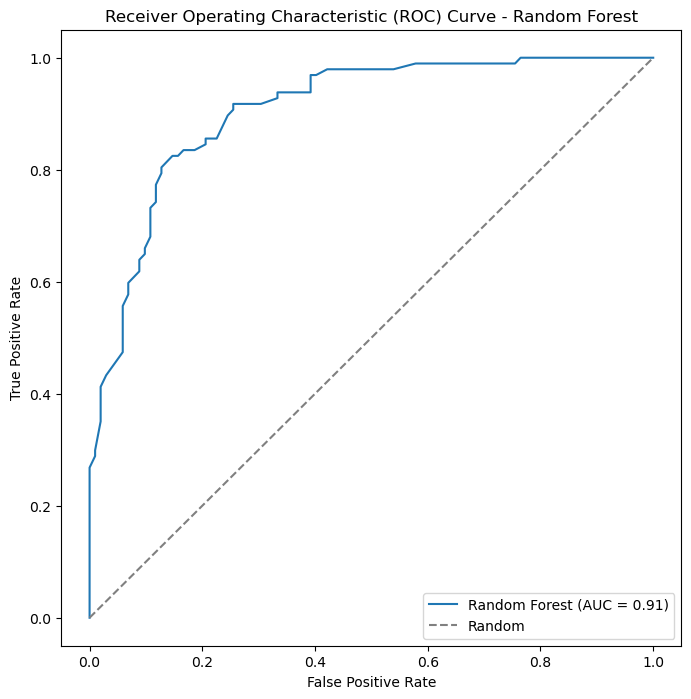

In [56]:
rf.fit(x_train, y_train)
y_prob_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

## Model Improvement Summary

- **Accuracy Score Improvement:**
  - The model's accuracy score has been enhanced through hyperparameter tuning.

- **Performance Enhancement (AUC):**
  - The model's performance, as measured by the Area Under the ROC Curve (AUC), has shown improvement after adjusting hyperparameters.

These adjustments demonstrate the effectiveness of hyperparameter tuning in optimizing the model's predictive capabilities.

In [58]:
#Save the Model
import joblib
joblib.dump(model,"Loan Application Status Prediction")

['Loan Application Status Prediction']

In [60]:
#Load the Model
Model = joblib.load("Loan Application Status Prediction")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
194,1,1
195,0,0
196,1,1
197,0,0


## Conclusion

- **Objective Achievement:**
  - The project successfully achieved its objective of building a predictive model to determine loan approval or rejection.

- **Model Features:**
  - Utilizing customer details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and other relevant factors.

- **Customer Segmentation:**
  - The model effectively identifies customer segments eligible for loan approval based on the provided features.

The implemented model serves as a valuable tool for decision-making in the loan approval process, leveraging customer information to assess eligibility.
